In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate,fftpack


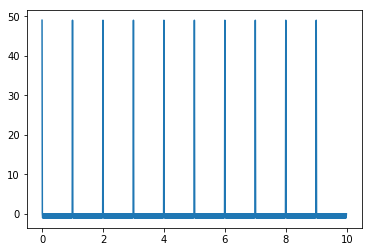

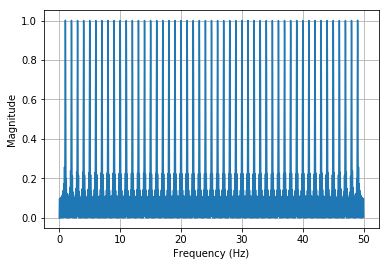

In [96]:
mu, sigma = 0, 1 # mean and standard deviation
n = 2**16

fs = 100
ps = 1/fs
ts_new =  np.arange(0, 10, ps)
s = np.zeros(len(ts_new))
for i in range(1,50):
    s += np.cos(2*np.pi*i*ts_new)
    
plt.plot(ts_new, s)

spectrum = fftpack.fft(s, n=n)/len(s)
spectrum_ss = spectrum[0:n//2]
spectrum_ss[2:] = 2*spectrum_ss[2:]
freq = np.linspace(0, fs/2, num=int(n//2))
plt.figure()
plt.plot(freq, np.abs(spectrum_ss))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

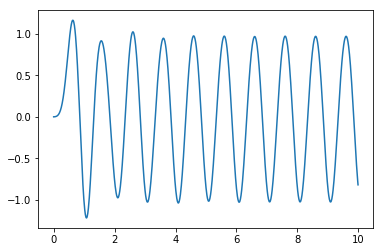

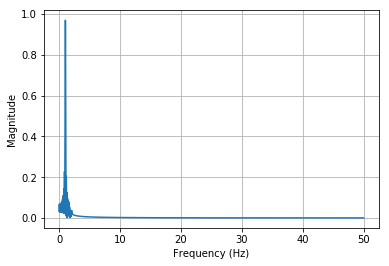

In [136]:
b, a = signal.butter(6, 0.1)
b, a = signal.ellip(8, 0.01, 100, 0.03)
#s_lpf = signal.filtfilt(b, a, s)
s_lpf = signal.lfilter(b, a, s)
plt.plot(ts_new, s_lpf)
plt.figure()
spectrum = fftpack.fft(s_lpf, n=n)/len(s)
spectrum_ss = spectrum[0:n//2]
spectrum_ss[2:] = 2*spectrum_ss[2:]
freq = np.linspace(0, fs/2, num=int(n//2))
plt.figure()
plt.plot(freq, np.abs(spectrum_ss))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()